# **TCC_p08_Gerar_Pdf_Sumarizado_e_Apuração_Pesquisa.ipynb**

# **Etapa 1 - Gerar resumos em pdf para a pesquisa com os julgadores**
O objetivo deste notebook é gerar resumos dos sumarizadores Edmundson, Lsa e TextRank em um pdf para que julgadores respondam a um pesquisa de qualidade dos resumos. O resultado da pesquisa será comparado com o resultado da avaliação automática com base na acurácia de classificação dos resumos por assunto. Os sumarizadores foram escolhidos em função da classificação automática.
Serão resumidos 48 processos por sumarizador. Os processos são os mesmos para todos os sumarizadores. A seleção dos processos obdecerá os seguintes critérios:

* Processos com 11 ou 12 frases: para não gerar resumos grandes, não onerar o tempo da pesquisa e não desanimar os colaboradores.
* Cada categoria assunto terá 12 processos. Essa seleção foi garantida no bloco 9. Criação de Pdf com os resumos para avaliação pelos julgadores.
* Foram gerados 3 pdf com os 48 processos sendo que cada pdf com 16 processos por tipo de sumarizador, mas organizados em ordem diferente. No notebook, gerei os 48 processos por sumarizador e, manualmente, misturei os pdf. Então, solicitei que os julgadores nascidos nos dias 01 a 10 utilizassem o arquivo pdf Primeiro grupo - 01E02T03L, os nascidos nos dias 11 a 20, Segundo grupo - 01L02E03T e os demais, Terceiro grupo - 01T02L03E. No título dos pdf, a letra E significa Edmundson, a letra L, Lsa, e a letra T, TextRank, e 01, processos 1 a 16, 02, processos 17 a 32, 03, processos 33 a 48. O julgadores não sabiam sobre a terminologia e organização. 

1.   Importação de bibliotecas
* Pandas: para criação e manipulação de dataframes
* re: para utilização das expressões regulares em operações de de pesquisas e substituições em string.
* numpy: para trabalhar com array.
* nltk: usada para tokenizar textos em sentenças dos votos e dos resumos para a impressão do pdf com os resumos.
* nltk punkt: Punkt é uma ferramenta de segmentação de frases neutra em termos de linguagem utilizada na tokenização.
* seaborn: biblioteca para visualização de dados baseada em Matplotlib para trabalhar com os gráficos de visualização da pesquisa sobre a qualidade dos resumos.
* matplotlib: biblioteca para a criação de visualizações estáticas, animadas e interativas em Python.
* sklearn: para utilização da métricas de classificação matriz de confusão.

2. Importação da biblioteca de sumarização Sumy
* Biblioteca simples e utilitário de linha de comando para extrair resumos de páginas HTML ou textos simples. Foi a biblioteca escolhida para a maioria dos sumarizadores utilizados no TCC. Ver notebook TCC_p07_Sumarização_Sumy_DCNN. Neste notebook, foram importados os três sumarizadores escolhidos para a pesquisa: LsaSummarizer, TextRankSummarizer e EdmundsonSummarizer.

3.   Montar Drive
> Com ***drive.mount***('/content/drive', force_remount=True) os diretórios de dados do ***Google Drive*** são montados para utilização no ***Colab*** permitindo salvar arquivos e modelos treinados para utilização posterior, inclusive, em outros notebooks.

4. Função sumarizar_sumy
```
  Faz a sumarização do texto recebido para o sumarizador carregado.
  O texto é resumido para 40% das frases.
  :parâmetro texto: recebe o texto do voto.
  :retorno melhores_sentencas: retorna texto com as principais sentenças de acordo com o sumarizador.
```

5. Ler no drive o dataframe X_teste_gerar_pdf_sumarizado_pesquisa_1781
* Ler no drive o dataframe X_teste_gerar_pdf_sumarizado_pesquisa_1781.csv gravado no notebook TCC_p01_preparar_X_treinamento_e_y_teste com o dataframe X_teste acrescido dos atributos qtdfrase e assunto necessários para este notebook.

6. Sumarização
> Os sumarizadores escolhidos para a pesquisa, Edmundson, Lsa e TextRank, são da biblioteca Sumy.

6.1 EdmundsonSummarizer
> O sumarizador Edmundson necessita receber listas com palavras bônus, nulas e stigmas. As palavras bônus e as palavras nulas foram carregadas no drive pelo notebook TCC_p04_Prepara_Palavras_Bonus_e_Nulas_para_Edmundson. Nesse passo, elas são recuperadas para serem utilizadas como input para o sumarizador. 
> Instancia o objeto sumarizador EdmundsonSummarizer

6.2 Lsa e TextRank
> Instancia o objeto sumarizador LsaSummarizer ou TextRankSummarizer.

7. Executar a função sumarizar_sumy
> Executa a função sumarizar_sumy que irá receber o texto do voto e retornar o voto sumarizado de acordo com o sumarizador que estiver carregado. Foi utilizada a função apply para fazer esta transformação.

8. Selecionar processos com 11 ou 12 frases
> Com base no atributo qtdfrase são selecionados processos com 11 ou 12, conforme descrito no caput.

9. Criação de Pdf com os resumos para avaliação pelos julgadores

* Importação da biblioteca ReportLab. De acordo com o sítio do desenvolvedor, https://www.reportlab.com/opensource/, ReportLab é o mecanismo de código aberto para a criação de documentos PDF baseados em dados complexos e gráficos vetoriais personalizados. A biblioteca implementa três camadas principais: Uma API de tela gráfica que 'desenha' páginas PDF, uma biblioteca de gráficos e widgets para criar gráficos de dados reutilizáveis e mm mecanismo de layout de página - PLATYPUS ("Layout de página e tipografia usando scripts") - que cria documentos a partir de elementos como títulos, parágrafos, fontes, tabelas e gráficos vetoriais.
* Ler o dataframe X_teste com processos já selecionados pelo número de frases e contar 48 processos sendo 12 de cada categoria assunto e criar um pdf com o número do processo, informação Processo: *número do processo* e o título **Resumo do voto**. Em seguida, Processo: *número do processo* e o título **Voto completo**. No resumo, utilizei fonte cor preta, e no voto completo fonte cor preta para as frases que fizeram parte do resumo e fonte cor vermelha para a frases desprezadas. O julgador foi orientado a só olhar o voto completo caso precisasse sanar alguma dúvida. Incentivei os julgadores a não consultar o voto completo.








## 1.   Importação de bibliotecas



In [ ]:
import re
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 2. Importação da biblioteca de sumarização Sumy

- https://pypi.org/project/sumy/

In [ ]:
!pip install sumy

     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 10.1MB 10.7MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21680 sha256=99e0233096f00ea664a5951e1bb27c3401387f89ad2bf949aa3df262ed3f13f3
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=17c93e0577363c7a6dc9c6c656cfbcd768f2e81b2ee5815b62ed58aaabe928fb
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built breadability pycountry


In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.edmundson import EdmundsonSummarizer

## 3.   Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


## 4. Funções

In [ ]:
def sumarizar_sumy(texto):
  """
  Faz a sumarização do texto recebido para o sumarizador carregado.
  O texto é resumido para 40% das frases.
  :parâmetro texto: recebe o texto do voto.
  :retorno melhores_sentencas: retorna texto com as principais sentenças de acordo com o sumarizador.
  """
  parser = PlaintextParser.from_string(texto, Tokenizer('portuguese'))
  quantidade_sentencas = int(0.4 * len(parser.document.sentences))
  if quantidade_sentencas < 4:
    quantidade_sentencas = 4

  resumo = sumarizador(parser.document, quantidade_sentencas)
  melhores_sentencas = []
  for sentenca in resumo:
    melhores_sentencas.append(str(sentenca).replace("Sentence: ",""))
  melhores_sentencas = str(melhores_sentencas).replace("',", '').replace("'", '').replace('[', '').replace(']', '')

  return melhores_sentencas

##5. Ler no drive o dataframe X_teste_gerar_pdf_sumarizado_pesquisa_1781 

In [ ]:
url = '/content/drive/MyDrive/X_teste_gerar_pdf_sumarizado_pesquisa_1781.csv' 
X_teste = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True)

## 6. Sumarização

6.1 EdmundsonSummarizer


In [ ]:
sumarizador = EdmundsonSummarizer()

In [ ]:
#Carregar palavras mais frequentes das ementas e da última frase.
url = '/content/drive/MyDrive/df_palavras_ementa.csv' 
df_bonus_words_1 = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True) 
url = '/content/drive/MyDrive/df_palavras_ultima_frase.csv' 
df_bonus_words_2 = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True) 
#Carregar palavras stigma com os nomes dos relatores.
url = '/content/drive/MyDrive/df_palavras_relatores.csv' 
df_stigma_words = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True) 
#Carregar palavras nulas com as stop words da SpaCy e da NLTK.
url = '/content/drive/MyDrive/df_palavras_stop_words.csv' 
df_stop_words = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True) 

In [ ]:
list_bonus_words = list(pd.concat([df_bonus_words_1, df_bonus_words_2])['0'])
list_stigma_words = list(df_stigma_words['0'])
list_stop_words = list(df_stop_words['0'])

In [ ]:
#Palavras stigma e nulas para o sumarizador Edmundson.
null_words = list_stigma_words + stop_words
sumarizador.bonus_words = list_bonus_words
sumarizador.stigma_words = list_stigma_words
sumarizador.null_words = list_stop_words

6.2 Lsa e TextRank

In [ ]:
sumarizador = LsaSummarizer()
#sumarizador = TextRankSummarizer()

## 7. Executar a função sumarizar_sumy

In [ ]:
#Mostra o sumarizador ativo
sumarizador

In [ ]:
X_teste_copy = X_teste.copy()

In [ ]:
#sumarizar o voto com o sumarizador ativo
X_teste_copy['resumo'] = X_teste_copy['voto'].apply(sumarizar_sumy)

In [ ]:
X_teste_copy.head()

,processo,voto,qtdfrase,assunto,resumo
0,10073721565201195,de acordo com o despacho de admissibilidade do...,14,paf,importa ressaltar que trata-se de simples lap...
1,16682721098201373,os fatos que ensejaram a autuação objeto dos p...,33,irpj,os fatos que ensejaram a autuação objeto dos p...
2,10218721139201321,o recurso é tempestivo e atende aos requisitos...,30,irpf,o recurso é tempestivo e atende aos requisitos...
3,10880910301200802,o recurso voluntário apresentado pela recorren...,11,irpj,o recurso voluntário apresentado pela recorren...
4,10980010538200693,"presente o pressuposto de admissibilidade, por...",26,irpf,"presente o pressuposto de admissibilidade, por..."


## 8. Selecionar processos com 11 ou 12 frases


In [ ]:
X_teste_sumario = X_teste_copy[(X_teste_copy['qtdfrase'] == 11) | (X_teste_copy['qtdfrase'] == 12)]

In [ ]:
X_teste_sumario.head()

,processo,voto,qtdfrase,assunto,resumo
3,10880910301200802,o recurso voluntário apresentado pela recorren...,11,irpj,o recurso voluntário apresentado pela recorren...
7,16682900843201004,divirjo do entendimento da ilustre relatora de...,11,paf,"e, também, da ementa do acórdão: per/dcomp, ..."
15,10283900221200951,observando o que determina os artigos 5 e 33 a...,11,ngdt,observando o que determina os artigos 5 e 33 a...
57,16151000450200874,admissibilidade conforme consta da folha 45 ...,11,irpf,"2005.0300055414, que tramitou perante a 1ª var..."
81,10070000947200644,por ser tempestivo e por preencher as demais c...,12,irpf,"por outro lado, a leitura integrada dos artigo..."


## 9. Criação de Pdf com os resumos para avaliação pelos julgadores

https://www.reportlab.com/opensource/

In [ ]:
!pip install reportlab

In [ ]:
from reportlab.lib.enums import TA_JUSTIFY
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch

In [ ]:
#grava pdf com 48 processos. 12 de cada um dos assuntos.
doc = SimpleDocTemplate("acordãos sumarizados.pdf",pagesize=letter,
                        rightMargin=50,leftMargin=50,
                        topMargin=18,bottomMargin=18)
Story=[]

styles=getSampleStyleSheet()
styles.add(ParagraphStyle(name='Justify', alignment=TA_JUSTIFY))
qtdeAssunto = np.zeros(4)  
listaAssunto = ['irpj', 'irpf', 'ngdt', 'paf']  
listaProcessosSelecionados =  []
cont = 0
for indice, linha in X_teste_sumario.iterrows():
  processo = linha['processo']
  assunto = linha['assunto']
  qtdeAssunto[listaAssunto.index(assunto)] += 1
  if qtdeAssunto[listaAssunto.index(assunto)] > 12:
    continue
  listaProcessosSelecionados.append(processo)
  cont += 1
  sentencas_originais = sent_tokenize(linha['voto'])
  melhores_sentencas = sent_tokenize(linha['resumo'])

  texto = f'<font size="12" color="blue">Processo: </font> <font size="12" color="black">{processo}</font>'
  Story.append(Paragraph(texto, styles["Normal"]))
  Story.append(Spacer(1, 12))

  texto = f'<font size="12" color="blue">Resumo do voto</font>'
  Story.append(Paragraph(texto, styles["Normal"]))
  Story.append(Spacer(1, 12))

  for sentenca in sentencas_originais:
    if sentenca in melhores_sentencas:
      texto = f'<font size="12" color="black">{sentenca}</font>'
      Story.append(Paragraph(texto, styles["Justify"]))
      Story.append(Spacer(1, 12))
      ultima = True
    else:
      ultima = False  

  Story.append(PageBreak())
  texto = f'<font size="12" color="blue">Processo: </font> <font size="12" color="black">{processo}</font>'
  Story.append(Paragraph(texto, styles["Normal"]))
  Story.append(Spacer(1, 12))

  texto = f'<font size="12" color="blue">Voto completo</font>'
  Story.append(Paragraph(texto, styles["Normal"]))
  Story.append(Spacer(1, 12))

  for sentenca in sentencas_originais:
    if sentenca in melhores_sentencas:
      texto = f'<font size="12" color="black">{sentenca}</font>'
      Story.append(Paragraph(texto, styles["Justify"]))
    else:
      texto = f'<font size="12" color="red">{sentenca}</font>'
      Story.append(Paragraph(texto, styles["Justify"]))
    Story.append(Spacer(1, 12))

  Story.append(PageBreak())

doc.build(Story)
print(f'total de processos {cont}.')

total de processos 48.


In [ ]:
# salvei a lista listaProcessosSelecionados= [10880910301200802,  16682900843201004,  10283900221200951,  16151000450200874,  10070000947200644,  10680902614201564,  10280720288200852,  13531000261200677,  10240001879200712,  13047720112201661,  10980005943200771,  13808003852200102,  10675903195200917,  18471001510200455,  12448729542201825,  10680724496201113,  13941000265200712,  10840001465200643,  10830909150200827,  10880904190200897,  11030902589200998,  10480914404200927,  10580727100201207,  10882903439200827,  10880920090200999,  10880693174200944,  10166900016200921,  10510723190201444,  10980924270200911,  11610004310200716,  10680906700200906,  11080730129201512,  10850902764200921,  10880973302200931,  10980913216200941,  16327902857200960,  13819900031200693,  10680723052200946,  10675000307200544,  10675903184200929,  10675903185200973,  10380903442200982,  10680906701200942,  14120000055200823,  10835900005200831,  15467000524200937,  10380902416200856,  16327902852200937] 
listaProcessosSelecionados 

# **Etapa 2 - Apuração do resultado da pesquisa**

In [ ]:
#Cria dataframe com os processos selecionados para a pesquisa. Apenas o atributo processo.
df_processos_pesquisa = pd.DataFrame(listaProcessosSelecionados, columns = ['processo'])

In [ ]:
#Acrescenta o atributo assunto
df_processos_pesquisa = X_teste_copy.loc[X_teste_copy['processo'].isin(listaProcessosSelecionados)].iloc[:, [0,3]]

In [ ]:
#Acrescenta um sequencial
df_processos_pesquisa.insert(2, 'seq', range(1,49))

In [ ]:
df_processos_pesquisa.shape

(48, 3)

In [ ]:
df_processos_pesquisa.tail()

,processo,assunto,seq
990,14120000055200823,paf,44
1182,10835900005200831,ngdt,45
1256,15467000524200937,ngdt,46
1396,10380902416200856,ngdt,47
1529,16327902852200937,ngdt,48


In [ ]:
def sumarizador_grupo01(sequencial_processo):
  lista = []
  for i in sequencial_processo:
    if i < 17:
      lista.append('Edmundson')
    elif i > 32:
      lista.append('Lsa')
    else:
      lista.append('TextRank')
  return lista

def sumarizador_grupo02(sequencial_processo):
  lista = []
  for i in sequencial_processo:
    if i < 17:
      lista.append('Lsa')
    elif i > 32:
      lista.append('TextRank')
    else:
      lista.append('Edmundson')
  return lista

def sumarizador_grupo03(sequencial_processo):
  lista = []
  for i in sequencial_processo:
    if i < 17:
      lista.append('TextRank')
    elif i > 32:
      lista.append('Edmundson')
    else:
      lista.append('Lsa')
  return lista

In [ ]:
#Cria os atributos grupo01, grupo02 e grupo03 com o tipo de sumarizador para o processo em cada um dos grupos de pesquisa
df_processos_pesquisa = df_processos_pesquisa.assign(grupo01=sumarizador_grupo01(df_processos_pesquisa.seq))
df_processos_pesquisa = df_processos_pesquisa.assign(grupo02=sumarizador_grupo02(df_processos_pesquisa.seq))
df_processos_pesquisa = df_processos_pesquisa.assign(grupo03=sumarizador_grupo03(df_processos_pesquisa.seq))

In [ ]:
df_processos_pesquisa.head()

,processo,assunto,seq,grupo01,grupo02,grupo03
3,10880910301200802,irpj,1,Edmundson,Lsa,TextRank
7,16682900843201004,paf,2,Edmundson,Lsa,TextRank
15,10283900221200951,ngdt,3,Edmundson,Lsa,TextRank
57,16151000450200874,irpf,4,Edmundson,Lsa,TextRank
81,10070000947200644,irpf,5,Edmundson,Lsa,TextRank


In [ ]:
#Cria um dicionário com chave processo e valor assunto para registro no dataframe com o resultado da pesquisa do atributo assunto_alvo como a resposta correta
dict_assunto = dict(zip(df_processos_pesquisa['processo'], df_processos_pesquisa['assunto']))

In [ ]:
#Cria um dicionário com chave processo e valor resultado do julgamento para registro no dataframe com o resultado da pesquisa do atributo resultado_alvo como a resposta correta
#Esse atributo na constava no arquivo original e precisou ser extraído em pesquisa manual aos votos completos.
dict_resultado = {10070000947200644: 'Procedente ou procedente em parte',                                                       
 10166900016200921: 'Procedente ou procedente em parte',
 10240001879200712: 'Procedente ou procedente em parte',
 10280720288200852: 'Procedente ou procedente em parte',
 10283900221200951: 'Procedente ou procedente em parte',
 10380902416200856: 'Procedente ou procedente em parte',
 10380903442200982: 'Procedente ou procedente em parte',
 10480914404200927: 'Procedente ou procedente em parte',
 10510723190201444: 'Improcedente',
 10580727100201207: 'Procedente ou procedente em parte',
 10675000307200544: 'Procedente ou procedente em parte',
 10675903184200929: 'Improcedente',
 10675903185200973: 'Improcedente',
 10675903195200917: 'Improcedente',
 10680723052200946: 'Procedente ou procedente em parte',
 10680724496201113: 'Procedente ou procedente em parte',
 10680902614201564: 'Procedente ou procedente em parte',
 10680906700200906: 'Procedente ou procedente em parte',
 10680906701200942: 'Procedente ou procedente em parte',
 10830909150200827: 'Improcedente',
 10835900005200831: 'Procedente ou procedente em parte',
 10840001465200643: 'Procedente ou procedente em parte',
 10850902764200921: 'Procedente ou procedente em parte',
 10880693174200944: 'Procedente ou procedente em parte',
 10880904190200897: 'Procedente ou procedente em parte',
 10880910301200802: 'Procedente ou procedente em parte',
 10880920090200999: 'Procedente ou procedente em parte',
 10880973302200931: 'Procedente ou procedente em parte',
 10882903439200827: 'Procedente ou procedente em parte',
 10980005943200771: 'Procedente ou procedente em parte',
 10980913216200941: 'Procedente ou procedente em parte',
 10980924270200911: 'Procedente ou procedente em parte',
 11030902589200998: 'Improcedente',
 11080730129201512: 'Procedente ou procedente em parte',
 11610004310200716: 'Procedente ou procedente em parte',
 12448729542201825: 'Procedente ou procedente em parte',
 13047720112201661: 'Procedente ou procedente em parte',
 13531000261200677: 'Procedente ou procedente em parte',
 13808003852200102: 'Procedente ou procedente em parte',
 13819900031200693: 'Procedente ou procedente em parte',
 13941000265200712: 'Procedente ou procedente em parte',
 14120000055200823: 'Procedente ou procedente em parte',
 15467000524200937: 'Procedente ou procedente em parte',
 16151000450200874: 'Procedente ou procedente em parte',
 16327902852200937: 'Procedente ou procedente em parte',
 16327902857200960: 'Procedente ou procedente em parte',
 16682900843201004: 'Improcedente',
 18471001510200455: 'Procedente ou procedente em parte'}

In [ ]:
#Carregar a planilha baixada do Teams com o resultado da pesquisa. Foram desprezadas colunas sem interesse para a apuração como hora inicio, email, etc.
url = '/content/drive/MyDrive/Pesquisa_qualidade_dos_resumos_automáticos.csv' 
#names colunas do csv=['id', 'Hora de início', 'horafim', 'email', 'nome', 'grupo', 'processo', 'assunto', 'resultado', 'notanan', 'notacompreensao', 'notacoesao'], usecols=[0,1, 2, 3, 4,5,6,7,8,9,10,11])
df_apuracao_pesquisa = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True, header=0, names=['nome', 'grupo', 'processo', 'assunto', 'resultado', 'notacompreensao', 'notacoesao'], usecols=[4,5,6,7,8,10,11])

In [ ]:
def acerta_processo(processo):
  """
  Função para acertar números de processos da pesquisa.
  Foram relatados erros pelos participantes da pesquisa informando que o formulário Teams estava acrescentando 1 ao número do processo em algumas situações não detectadas.
  Como a pesquisa já havia sido respondida por vários julgadores, optei por fazer a correção do número do processo por comparação de parte do número do processo com a função acerta_processo.
  Entretanto, ao fazer a correção, percebi que alguns julgadores não utilizaram o copiar colar, pois havia erro nos preenchimentos dos números dos processos.
  Observando os erros, percebi que eram dígitos acrescentados ou subtraídos. Portanto, acrescentei na função acerta_processo uma comparação entre os dígitos vizinhos.
  Dessa forma, acertei o número de processo pelos processos com maior quantidade de dígitos correspondentes após a comparação dos vizinhos.
  Como não é possível estabelecer que os erros sempre seguirão esse padrão, os processos com erro e seus correspondentes foram impressos para verificação.
  :parâmetro processo: recebe os valores da coluna processo.
  :retorno processo_acertado: retorna o valor corrigido da coluna com base nos processos selecionados para a pesquisa.
  """

  parte_processo = str(processo)[:11]
  achou = False
  processo_acertado = 0
  for processo_selecionado in listaProcessosSelecionados:
    if parte_processo == str(processo_selecionado)[:-6]:
      achou = True
      processo_acertado = processo_selecionado
      break

  if not achou:
    print('não achou ', parte_processo)
    cont_similaridade = 0
    max_similaridade = 0
    processo_correspondente = 0
    for processo_selecionado in listaProcessosSelecionados:
      for i in range(0,11):
        if str(processo)[i] == str(processo_selecionado)[i]:
          cont_similaridade += 1
        elif str(processo)[i] == str(processo_selecionado)[i+1]:
          cont_similaridade += 1
        elif str(processo)[i+1] == str(processo_selecionado)[i]:
          cont_similaridade += 1
      
      if cont_similaridade > max_similaridade:
        processo_correspondente = processo_selecionado
        max_similaridade = cont_similaridade  
      
      cont_similaridade = 0
    print(processo, processo_correspondente, max_similaridade)
    processo_acertado = processo_selecionado
#  if not achou:
#   print(processo, 'não achei')

  return processo_acertado

In [ ]:
#Acerta números de processos com erro
df_apuracao_pesquisa['processo'] = df_apuracao_pesquisa['processo'].apply(acerta_processo)

não achou  10166900012
1016690001200921 10166900016200921 11
não achou  10280390022
102803900221200951 10283900221200951 11
não achou  10283900211
1028390021100951 10283900221200951 11
não achou  10283900222
102839002221200940 10283900221200951 11
não achou  10380090344
103800903442200980 10380903442200982 11
não achou  10835900000
108359000005200830 10835900005200831 11
não achou  10980059432
1098005943200771 10980005943200771 11
não achou  11610043102
1161004310200716 11610004310200716 11
não achou  13080038522
1308003852200102 13808003852200102 11
não achou  13631000261
13631000261200676 13531000261200677 10
não achou  13819900312
1381990031200693 13819900031200693 11
não achou  16150000450
16150000450200874 16151000450200874 11
não achou  16151004502
16151004502200874 16151000450200874 11


In [ ]:
df_apuracao_pesquisa.assunto.unique()

array(['NGDT - Normas Gerais de Direito Tributário',
       'PAF - Processo Administrativo Fiscal', 'IRPJ/CSLL',
       'IRPF - Imposto de Renda Pessoa Fisica', 'Não sei',
       'IRPJ - Imposto de Renda Pessoa Jurídica'], dtype=object)

In [ ]:
#Altera literais de assunto da pesquisa para o formato que estou trabalhando nos notebooks
#Na pesquisa, alterei a pedido os assuntos para um literal mais completo que facilitaria o entendimento dos julgadores.
#Como a alteração foi feita com a pesquisa já iniciada, no caso de IRPJ ficaram 2 literais.
df_apuracao_pesquisa['assunto'] = df_apuracao_pesquisa['assunto'].replace(['NGDT - Normas Gerais de Direito Tributário',
       'PAF - Processo Administrativo Fiscal',
       'IRPF - Imposto de Renda Pessoa Fisica', 
       'IRPJ - Imposto de Renda Pessoa Jurídica', 'IRPJ/CSLL'],['ngdt','paf','irpf','irpj','irpj'])

In [ ]:
def verifica_assunto(linha):
  """
  Cria o atributo assunto_alvo com o assunto correspondente ao processo recebido.
  O assunto é obtido no dicionário de assuntos.
  :parâmetro linha: recebe a linha do dataframe que contém o atributo processo.
  :retorno dict_assunto[linha.loc['processo']] com o assunto correspondente ao processo da linha corrente.
  """
  return dict_assunto[linha.loc['processo']]

def confere_assunto(linha):
  """
  Recebe a linha do dataframe com os atributos assunto e assunto_alvo e verifica se são iguais.
  O retorno da função criará o atributo acertou_assunto.
  :parâmetro linha: linha do dataframe.
  :retorno: literal sim ou não de acordo com a correspondência.
  """
  if linha.loc['assunto'] == linha.loc['assunto_alvo']:
    return 'sim'
  else:
    return 'não'

def verifica_resultado(linha):
  """
  Cria o atributo resultado_alvo com o resultado de julgamento correspondente ao processo recebido.
  O resultado é obtido no dicionário de resultados.
  :parâmetro linha: recebe a linha do dataframe que contém o atributo processo.
  :retorno dict_resultado[linha.loc['processo']] com o resultado de julgamento correspondente ao processo da linha corrente.
  """
  return dict_resultado[linha.loc['processo']]

def confere_resultado(linha):
  """
  Recebe a linha do dataframe com os atributos resultado e resultado_alvo e verifica se são iguais.
  O retorno da função criará o atributo acertou_resultado.
  :parâmetro linha: linha do dataframe.
  :retorno: literal sim ou não de acordo com a correspondência.
  """
  if linha.loc['resultado'] == linha.loc['resultado_alvo']:
    return 'sim'
  else:
    return 'não'

In [ ]:
# Cria o atributo assunto_alvo com o assunto correspondente ao processo recebido e o atributo acertou_assunto com o resultado da resposta da pesquisa
df_apuracao_pesquisa['assunto_alvo'] = df_apuracao_pesquisa.apply(verifica_assunto, axis=1)
df_apuracao_pesquisa['acertou_assunto'] = df_apuracao_pesquisa.apply(confere_assunto, axis=1)

In [ ]:
# Cria o atributo resultado_alvo com o resultado de julgamento correspondente ao processo recebido e o atributo acertou_resultado com o resultado da resposta da pesquisa
df_apuracao_pesquisa['resultado_alvo'] = df_apuracao_pesquisa.apply(verifica_resultado, axis=1)
df_apuracao_pesquisa['acertou_resultado'] = df_apuracao_pesquisa.apply(confere_resultado, axis=1)

In [ ]:
df_apuracao_pesquisa.head()

,nome,grupo,processo,assunto,resultado,notacompreensao,notacoesao,assunto_alvo,acertou_assunto,resultado_alvo,acertou_resultado
0,Saulo de Tarso Castro Pessoa,Segundo grupo,10675000307200544,ngdt,Não sei,3,2,paf,não,Procedente ou procedente em parte,não
1,Saulo de Tarso Castro Pessoa,Segundo grupo,10675903184200929,paf,Improcedente,7,4,paf,sim,Improcedente,sim
2,Marcelo Veiga Ferreira,Primeiro grupo,10680724496201113,ngdt,Procedente ou procedente em parte,4,2,paf,não,Procedente ou procedente em parte,sim
3,Marcelo Veiga Ferreira,Primeiro grupo,10680902614201564,irpj,Procedente ou procedente em parte,10,10,irpj,sim,Procedente ou procedente em parte,sim
4,Saulo de Tarso Castro Pessoa,Segundo grupo,10880904190200897,irpj,Procedente ou procedente em parte,7,7,irpj,sim,Procedente ou procedente em parte,sim


In [ ]:
#Cria o atributo sumarizador no dataframe com a apuração da pesquisa informando qual é o sumarizador correspondente ao processo e ao grupo da pesquisa.
df1 = df_apuracao_pesquisa[df_apuracao_pesquisa['processo'].isin(listaProcessosSelecionados[:16])]
df1.loc[df1['grupo'] == 'Primeiro grupo', 'sumarizador'] = 'Edmundson'
df1.loc[df1['grupo'] == 'Segundo grupo', 'sumarizador'] = 'Lsa'
df1.loc[df1['grupo'] == 'Terceiro grupo', 'sumarizador'] = 'TextRank'
df2 = df_apuracao_pesquisa[df_apuracao_pesquisa['processo'].isin(listaProcessosSelecionados[16:32])]
df2.loc[df2['grupo'] == 'Primeiro grupo', 'sumarizador'] = 'TextRank'
df2.loc[df2['grupo'] == 'Segundo grupo', 'sumarizador'] = 'Edmundson'
df2.loc[df2['grupo'] == 'Terceiro grupo', 'sumarizador'] = 'Lsa'
df3 = df_apuracao_pesquisa[df_apuracao_pesquisa['processo'].isin(listaProcessosSelecionados[32:])]
df3.loc[df3['grupo'] == 'Primeiro grupo', 'sumarizador'] = 'Lsa'
df3.loc[df3['grupo'] == 'Segundo grupo', 'sumarizador'] = 'TextRank'
df3.loc[df3['grupo'] == 'Terceiro grupo', 'sumarizador'] = 'Edmundson'
df4 = pd.concat([df1, df2, df3])

In [ ]:
df4.sort_values(by=['processo']).head()

,nome,grupo,processo,assunto,resultado,notacompreensao,notacoesao,assunto_alvo,acertou_assunto,resultado_alvo,acertou_resultado,sumarizador
34,Fernando.Montanari@rfb.gov.br,Terceiro grupo,10070000947200644,irpf,Procedente ou procedente em parte,5,6,irpf,sim,Procedente ou procedente em parte,sim,TextRank
24,Marcelo.Aguiar@rfb.gov.br,Terceiro grupo,10070000947200644,irpf,Procedente ou procedente em parte,9,8,irpf,sim,Procedente ou procedente em parte,sim,TextRank
25,Ana Paula Silveira,Segundo grupo,10070000947200644,irpf,Procedente ou procedente em parte,9,9,irpf,sim,Procedente ou procedente em parte,sim,Lsa
27,Heloisa de Moraes Silveira,Primeiro grupo,10070000947200644,irpf,Procedente ou procedente em parte,6,6,irpf,sim,Procedente ou procedente em parte,sim,Edmundson
28,José Ricardo Cota Valente,Segundo grupo,10070000947200644,irpf,Procedente ou procedente em parte,9,6,irpf,sim,Procedente ou procedente em parte,sim,Lsa


In [ ]:
#Utilizado para checagem da correspondência sumarizador por processo e grupo. Pode excluir....
df_processos_pesquisa.head()

,processo,assunto,seq,grupo01,grupo02,grupo03
3,10880910301200802,irpj,1,Edmundson,Lsa,TextRank
7,16682900843201004,paf,2,Edmundson,Lsa,TextRank
15,10283900221200951,ngdt,3,Edmundson,Lsa,TextRank
57,16151000450200874,irpf,4,Edmundson,Lsa,TextRank
81,10070000947200644,irpf,5,Edmundson,Lsa,TextRank


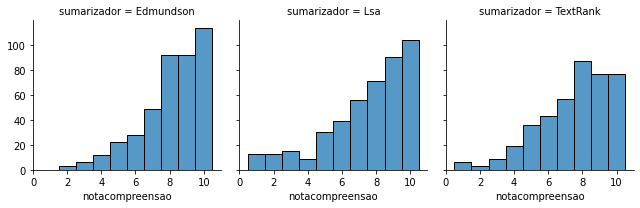

In [ ]:
#Criar os gráficos Notas de compreensão por sumarizador - histograma
g = sns.FacetGrid(df4, col="sumarizador")
g.map(sns.histplot, "notacompreensao", discrete=True)
#plt.title("Notas de compreensão por sumarizador - histograma") 
plt.show()

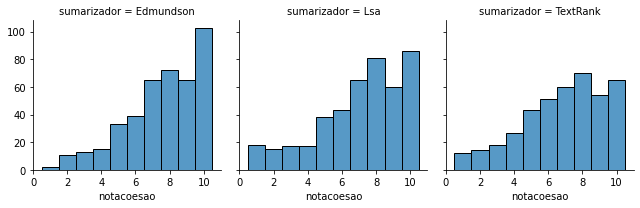

In [ ]:
g = sns.FacetGrid(df4, col="sumarizador")
g.map(sns.histplot, "notacoesao", discrete=True)
plt.show()

In [ ]:
#Mostra as notas médias de coesão por sumarizador
df4.groupby("sumarizador").mean()['notacoesao'].sort_values()

sumarizador
TextRank     6.857488
Lsa          7.086364
Edmundson    7.578947
Name: notacoesao, dtype: float64

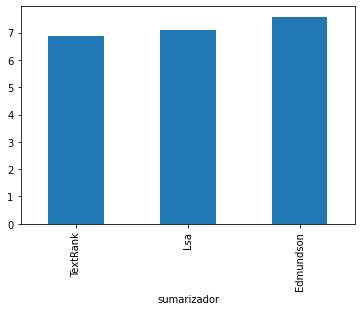

In [ ]:
#Mostra gráfico de barras com as Notas de coesão por sumarizador
#Mostre estimativas de pontos e intervalos de confiança como barras retangulares.#
#Um gráfico de barra representa uma estimativa de tendência central para uma variável numérica com a altura de cada retângulo e fornece alguma indicação da incerteza em torno dessa estimativa usando barras de erro. 
#Os gráficos de barra incluem 0 no intervalo do eixo quantitativo e são uma boa escolha quando 0 é um valor significativo para a variável quantitativa e você deseja fazer comparações com ele.
df4.groupby("sumarizador").mean()['notacoesao'].sort_values().plot.bar()
#plt.title("Notas de compreensão por sumarizador") 
plt.show()

[(5.0, 10.0)]

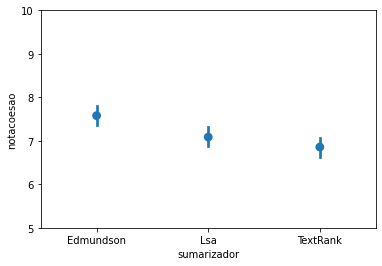

In [ ]:
#Mostre estimativas de pontos e intervalos de confiança usando glifos de gráfico de dispersão.
#Um gráfico de pontos representa uma estimativa da tendência central para uma variável numérica pela posição dos pontos do gráfico de dispersão e fornece alguma indicação da incerteza em torno dessa estimativa usando barras de erro.
ax = sns.pointplot(data=df4, x='sumarizador', y='notacoesao', linestyles=' ')
ax.set(ylim=(5, 10))

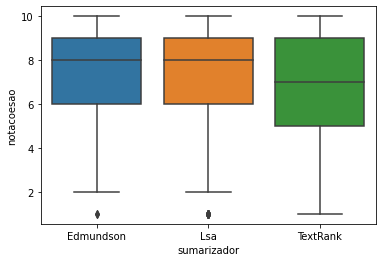

In [ ]:
#Desenhe um gráfico de caixa para mostrar as distribuições em relação às categorias.
#Um gráfico de caixa (ou gráfico de caixa e bigode) mostra a distribuição de dados quantitativos de uma forma que facilita as comparações entre variáveis ​​ou 
#entre os níveis de uma variável categórica. A caixa mostra os quartis do conjunto de dados enquanto os bigodes se estendem para mostrar o resto da distribuição, 
#exceto para pontos que são determinados como “outliers” usando um método que é uma função do intervalo interquartil.
ax = sns.boxplot(data=df4, x='sumarizador', y='notacoesao')

In [ ]:
Q1 = df4.loc[df4['sumarizador'] == 'Edmundson', 'notacoesao'].quantile(0.25) 
Q2 = df4.loc[df4['sumarizador'] == 'Edmundson', 'notacoesao'].quantile(0.50) 
Q3 = df4.loc[df4['sumarizador'] == 'Edmundson', 'notacoesao'].quantile(0.75) 
IQR = Q3 - Q1
LI = Q1 - ( 1.5 * IQR)
LS = Q3 + ( 1.5 * IQR)
print(f'Q1 {Q1}, Q2 {Q2}, Q3 {Q3}, IQR {IQR}, LI {LI}, LS {LS}')

Q1 6.0, Q2 8.0, Q3 9.0, IQR 3.0, LI 1.5, LS 13.5


In [ ]:
Q1 = df4.loc[df4['sumarizador'] == 'Lsa', 'notacoesao'].quantile(0.25) 
Q2 = df4.loc[df4['sumarizador'] == 'Lsa', 'notacoesao'].quantile(0.50) 
Q3 = df4.loc[df4['sumarizador'] == 'Lsa', 'notacoesao'].quantile(0.75) 
IQR = Q3 - Q1
LI = Q1 - ( 1.5 * IQR)
LS = Q3 + ( 1.5 * IQR)
print(f'Q1 {Q1}, Q2 {Q2}, Q3 {Q3}, IQR {IQR}, LI {LI}, LS {LS}')

Q1 6.0, Q2 8.0, Q3 9.0, IQR 3.0, LI 1.5, LS 13.5


In [ ]:
Q1 = df4.loc[df4['sumarizador'] == 'TextRank', 'notacoesao'].quantile(0.25) 
Q2 = df4.loc[df4['sumarizador'] == 'TextRank', 'notacoesao'].quantile(0.50) 
Q3 = df4.loc[df4['sumarizador'] == 'TextRank', 'notacoesao'].quantile(0.75) 
IQR = Q3 - Q1
LI = Q1 - ( 1.5 * IQR)
LS = Q3 + ( 1.5 * IQR)
print(f'Q1 {Q1}, Q2 {Q2}, Q3 {Q3}, IQR {IQR}, LI {LI}, LS {LS}')

Q1 5.0, Q2 7.0, Q3 9.0, IQR 4.0, LI -1.0, LS 15.0


In [ ]:
Q1 = df4['notacoesao'].quantile(0.25)
Q2 = df4['notacoesao'].quantile(0.50)
Q3 = df4['notacoesao'].quantile(0.75)
IQR = Q3 - Q1
LI = Q1 - ( 1.5 * IQR)
LS = Q3 + ( 1.5 * IQR)

In [ ]:
print(f'Q1 {Q1}, Q2 {Q2}, Q3 {Q3}, IQR {IQR}, LI {LI}, LS {LS}')

Q1 6.0, Q2 8.0, Q3 9.0, IQR 3.0, LI 1.5, LS 13.5


In [ ]:
#Mostra as notas médias de compreensão do texto por sumarizador
#Mostre estimativas de pontos e intervalos de confiança como barras retangulares.#
#Um gráfico de barra representa uma estimativa de tendência central para uma variável numérica com a altura de cada retângulo e fornece alguma indicação da incerteza em torno dessa estimativa usando barras de erro. 
#Os gráficos de barra incluem 0 no intervalo do eixo quantitativo e são uma boa escolha quando 0 é um valor significativo para a variável quantitativa e você deseja fazer comparações com ele.
df4.groupby("sumarizador").mean()['notacompreensao'].sort_values()

sumarizador
TextRank     7.514493
Lsa          7.531818
Edmundson    8.126794
Name: notacompreensao, dtype: float64

In [ ]:
pd_options = pd.options.display # Objeto para configuração do ambiente: número de linhas, colunas, precisão e etc
pd_options.max_rows = 200

In [ ]:
df4.groupby(['sumarizador', 'processo']).mean()['notacompreensao'].sort_values()

sumarizador  processo         
TextRank     11610004310200716    2.666667
Lsa          10283900221200951    3.222222
TextRank     10880904190200897    3.250000
Lsa          10980913216200941    4.000000
             15467000524200937    4.000000
TextRank     10980924270200911    4.000000
Edmundson    18471001510200455    4.400000
TextRank     10510723190201444    4.500000
             10882903439200827    4.500000
Lsa          16682900843201004    5.235294
TextRank     10675000307200544    5.333333
Lsa          13531000261200677    5.588235
             10680723052200946    5.750000
TextRank     13047720112201661    5.777778
Edmundson    10680902614201564    5.800000
             16682900843201004    5.833333
             10980005943200771    5.857143
TextRank     10980005943200771    5.888889
Lsa          13047720112201661    5.941176
TextRank     10675903185200973    6.000000
Lsa          18471001510200455    6.083333
TextRank     10675903184200929    6.166667
Edmundson    1304772011

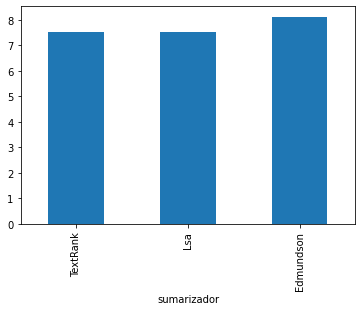

In [ ]:
df4.groupby("sumarizador").mean()['notacompreensao'].sort_values().plot.bar()

[(5.0, 10.0)]

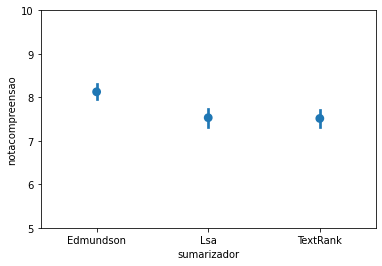

In [ ]:
#Mostre estimativas de pontos e intervalos de confiança usando glifos de gráfico de dispersão.
#Um gráfico de pontos representa uma estimativa da tendência central para uma variável numérica pela posição dos pontos do gráfico de dispersão e 
#fornece alguma indicação da incerteza em torno dessa estimativa usando barras de erro.
ax = sns.pointplot(data=df4, x='sumarizador', y='notacompreensao', linestyles=' ')
ax.set(ylim=(5, 10))

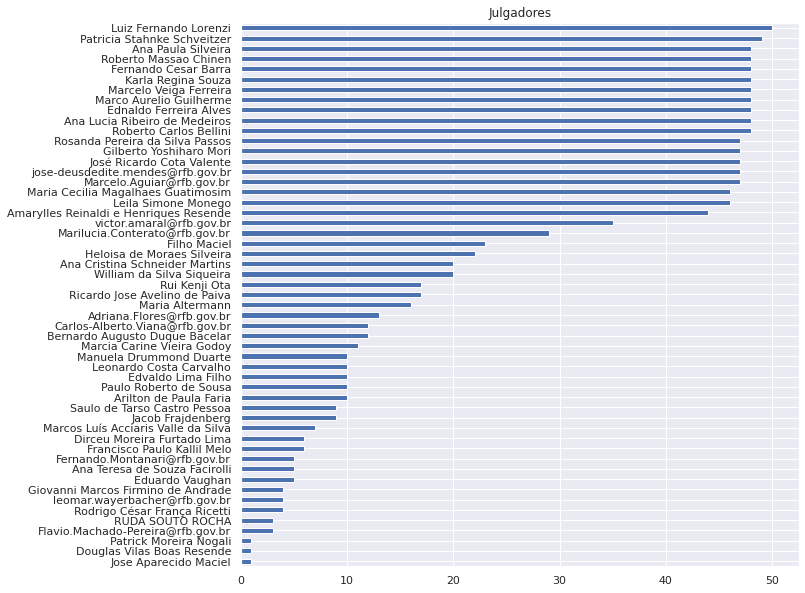

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.set_theme(style="darkgrid")
df4["nome"].value_counts(ascending=True).plot.barh()
plt.title("Julgadores") 
plt.rcParams['figure.figsize']=6,5

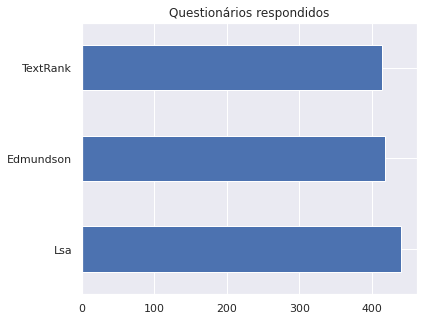

In [ ]:
sns.set_context('paper', font_scale=2)
sns.set_theme(style="darkgrid")
ax = df4["sumarizador"].value_counts().plot.barh()
plt.title("Questionários respondidos") 
plt.show()

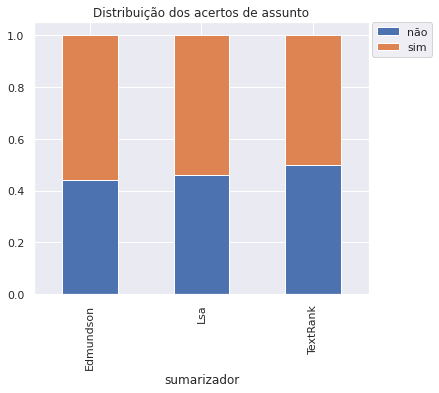

In [ ]:
#Gráfico de barras com a distribuição dos acertos em assunto. Fiz cálculos para obter o percentual de acerto e erro em relação ao total e colocar na mesma barra o resultado com a visão percentual.
sns.set_context(font_scale=1.1)
plt.rcParams['figure.figsize']=6,5
agrupado = df4.groupby(['sumarizador', 'acertou_assunto']).size().reset_index().pivot(columns='acertou_assunto', index='sumarizador', values=0)
ax = (agrupado/agrupado.sum(axis=1).values.reshape(3,1)).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Distribuição dos acertos de assunto") 
plt.show()

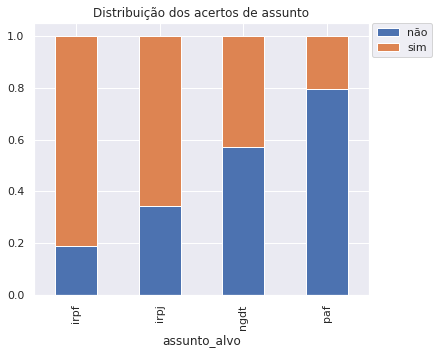

In [ ]:
#Gráfico de barras com a distribuição dos acertos em assunto. Fiz cálculos para obter o percentual de acerto e erro em relação ao total e colocar na mesma barra o resultado com a visão percentual.
sns.set_context(font_scale=1.1)
plt.rcParams['figure.figsize']=6,5
agrupado = df4.groupby(['assunto_alvo', 'acertou_assunto']).size().reset_index().pivot(columns='acertou_assunto', index='assunto_alvo', values=0)
ax = (agrupado/agrupado.sum(axis=1).values.reshape(4,1)).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Distribuição dos acertos de assunto") 
plt.show()

In [ ]:
df4.assunto_alvo.value_counts()

irpf    351
paf     316
irpj    304
ngdt    301
Name: assunto_alvo, dtype: int64

In [ ]:
df4.acertou_assunto.value_counts()

sim    679
não    593
Name: acertou_assunto, dtype: int64

In [ ]:
assunto_resultado_pesquisa = df4.iloc[:, 7].values
lista_assunto_alvo = df4.iloc[:, 3].values
rotulos_plt_alvo = list(set(df4.iloc[:, 3].values))

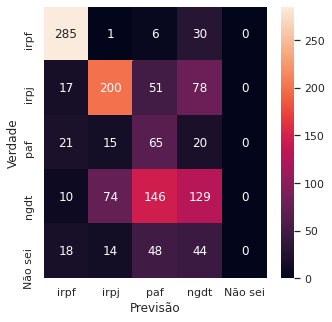

In [ ]:
#matriza de confusão sobre acertos de assunto segmentados por assunto
conf_mat_nb = confusion_matrix(lista_assunto_alvo, assunto_resultado_pesquisa, rotulos_plt_alvo)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_nb, annot=True, fmt='d',
            xticklabels=rotulos_plt_alvo, yticklabels=rotulos_plt_alvo)
plt.ylabel('Verdade')
plt.xlabel('Previsão')
plt.show()

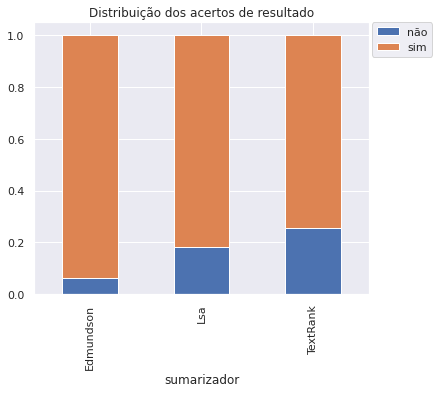

In [ ]:
#Gráfico de barras com a distribuição dos acertos em resultado. Fiz cálculos para obter o percentual de acerto e erro em relação ao total e colocar na mesma barra o resultado com a visão percentual.
sns.set_context(font_scale=1.1)
plt.rcParams['figure.figsize']=6,5
agrupado = df4.groupby(['sumarizador', 'acertou_resultado']).size().reset_index().pivot(columns='acertou_resultado', index='sumarizador', values=0)
ax = (agrupado/agrupado.sum(axis=1).values.reshape(3,1)).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Distribuição dos acertos de resultado") 
plt.show()

#Verificar acertos em assunto a partir da leitura dos resumos

In [ ]:
#Matriz de confusão Edmundson
assunto_resultado_pesquisa = df4.loc[df4['sumarizador'] == 'Edmundson'].assunto 
lista_assunto_alvo = df4.loc[df4['sumarizador'] == 'Edmundson'].assunto_alvo
rotulos_plt_alvo = df4.loc[df4['sumarizador'] == 'Edmundson'].assunto_alvo.unique()
rotulos_plt_alvo = np.append(rotulos_plt_alvo, 'Não sei')
rotulos_plt_pesquisa = df4.loc[df4['sumarizador'] == 'Edmundson'].assunto.unique()

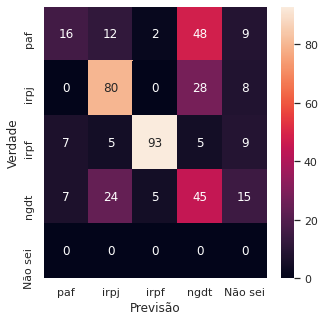

In [ ]:
conf_mat_nb = confusion_matrix(lista_assunto_alvo, assunto_resultado_pesquisa, rotulos_plt_alvo)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_nb, annot=True, fmt='d',
            xticklabels=rotulos_plt_alvo, yticklabels=rotulos_plt_alvo)
plt.ylabel('Verdade')
plt.xlabel('Previsão')
plt.show()

In [ ]:
#Matriz de confusão Lsa
assunto_resultado_pesquisa = df4.loc[df4['sumarizador'] == 'Lsa'].assunto 
lista_assunto_alvo = df4.loc[df4['sumarizador'] == 'Lsa'].assunto_alvo
rotulos_plt_alvo = df4.loc[df4['sumarizador'] == 'Lsa'].assunto_alvo.unique()
rotulos_plt_alvo = np.append(rotulos_plt_alvo, 'Não sei')
rotulos_plt_pesquisa = df4.loc[df4['sumarizador'] == 'Lsa'].assunto.unique()

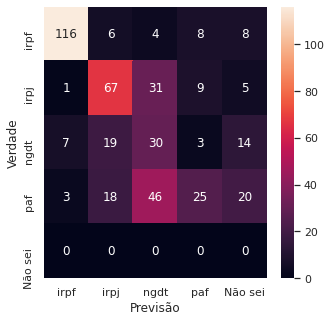

In [ ]:
conf_mat_nb = confusion_matrix(lista_assunto_alvo, assunto_resultado_pesquisa, rotulos_plt_alvo)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_nb, annot=True, fmt='d',
            xticklabels=rotulos_plt_alvo, yticklabels=rotulos_plt_alvo)
plt.ylabel('Verdade')
plt.xlabel('Previsão')
plt.show()

In [ ]:
#Matriz de confusão TextRank
assunto_resultado_pesquisa = df4.loc[df4['sumarizador'] == 'TextRank'].assunto 
lista_assunto_alvo = df4.loc[df4['sumarizador'] == 'TextRank'].assunto_alvo
rotulos_plt_alvo = df4.loc[df4['sumarizador'] == 'TextRank'].assunto_alvo.unique()
rotulos_plt_alvo = np.append(rotulos_plt_alvo, 'Não sei')
rotulos_plt_pesquisa = df4.loc[df4['sumarizador'] == 'TextRank'].assunto.unique()

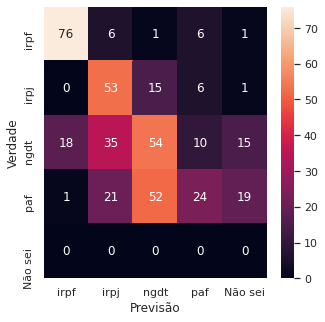

In [ ]:
conf_mat_nb = confusion_matrix(lista_assunto_alvo, assunto_resultado_pesquisa, rotulos_plt_alvo)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_nb, annot=True, fmt='d',
            xticklabels=rotulos_plt_alvo, yticklabels=rotulos_plt_alvo)
plt.ylabel('Verdade')
plt.xlabel('Previsão')
plt.show()

In [ ]:
df4.loc[df4['sumarizador'] == 'Edmundson'].acertou_assunto.value_counts()

sim    234
não    184
Name: acertou_assunto, dtype: int64

In [ ]:
#Calculei o percentual de acerto de assunto, ou seja, a acurácia
total_acertos_E = df4.loc[df4['sumarizador'] == 'Edmundson'].acertou_assunto.value_counts()[0] 
total_tentativas_E = df4.loc[df4['sumarizador'] == 'Edmundson'].acertou_assunto.value_counts()[0] + df4.loc[df4['sumarizador'] == 'Edmundson'].acertou_assunto.value_counts()[1]
percentual_acertos_E = total_acertos_E / total_tentativas_E
print(f'Percentual de acertos de assunto para os julgadores que leram o resumo Edmundson: em {total_tentativas_E} tentativas, acerto de {total_acertos_E}, ou {percentual_acertos_E:.2%}')

total_acertos_L = df4.loc[df4['sumarizador'] == 'Lsa'].acertou_assunto.value_counts()[0] 
total_tentativas_L = df4.loc[df4['sumarizador'] == 'Lsa'].acertou_assunto.value_counts()[0] + df4.loc[df4['sumarizador'] == 'Lsa'].acertou_assunto.value_counts()[1]
percentual_acertos_L = total_acertos_L / total_tentativas_L
print(f'Percentual de acertos de assunto para os julgadores que leram o resumo Lsa: em {total_tentativas_L} tentativas, acerto de {total_acertos_L}, ou {percentual_acertos_L:.2%}')

total_acertos_T = df4.loc[df4['sumarizador'] == 'TextRank'].acertou_assunto.value_counts()[0] 
total_tentativas_T = df4.loc[df4['sumarizador'] == 'TextRank'].acertou_assunto.value_counts()[0] + df4.loc[df4['sumarizador'] == 'TextRank'].acertou_assunto.value_counts()[1]
percentual_acertos_T = total_acertos_T / total_tentativas_T
print(f'Percentual de acertos de assunto para os julgadores que leram o resumo TextRank: em {total_tentativas_T} tentativas, acerto de {total_acertos_T}, ou {percentual_acertos_T:.2%}')

Percentual de acertos de assunto para os julgadores que leram o resumo Edmundson: em 418 tentativas, acerto de 234, ou 55.98%
Percentual de acertos de assunto para os julgadores que leram o resumo Lsa: em 440 tentativas, acerto de 238, ou 54.09%
Percentual de acertos de assunto para os julgadores que leram o resumo TextRank: em 414 tentativas, acerto de 207, ou 50.00%


#Verificar acertos em resultado a partir da leitura dos resumos

In [ ]:
#Matriz de confusão Edmundson 
resultado_resultado_pesquisa = df4.loc[df4['sumarizador'] == 'Edmundson'].resultado
lista_resultado_alvo = df4.loc[df4['sumarizador'] == 'Edmundson'].resultado_alvo
rotulos_plt_alvo = df4.loc[df4['sumarizador'] == 'Edmundson'].resultado_alvo.unique()
rotulos_plt_alvo = np.append(rotulos_plt_alvo, 'Não sei')
rotulos_plt_pesquisa = df4.loc[df4['sumarizador'] == 'Edmundson'].resultado.unique()

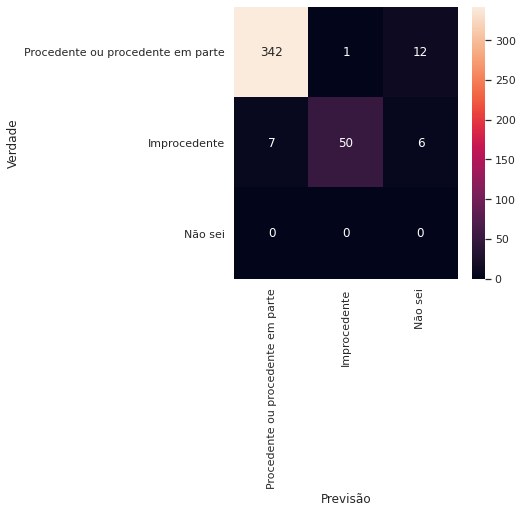

In [ ]:
conf_mat_nb = confusion_matrix(lista_resultado_alvo, resultado_resultado_pesquisa, rotulos_plt_alvo)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_nb, annot=True, fmt='d',
            xticklabels=rotulos_plt_alvo, yticklabels=rotulos_plt_alvo)
plt.ylabel('Verdade')
plt.xlabel('Previsão')
plt.show()

In [ ]:
#Matriz de confusão Lsa
resultado_resultado_pesquisa = df4.loc[df4['sumarizador'] == 'Lsa'].resultado
lista_resultado_alvo = df4.loc[df4['sumarizador'] == 'Lsa'].resultado_alvo
rotulos_plt_alvo = df4.loc[df4['sumarizador'] == 'Lsa'].resultado_alvo.unique()
rotulos_plt_alvo = np.append(rotulos_plt_alvo, 'Não sei')
rotulos_plt_pesquisa = df4.loc[df4['sumarizador'] == 'Lsa'].resultado.unique()

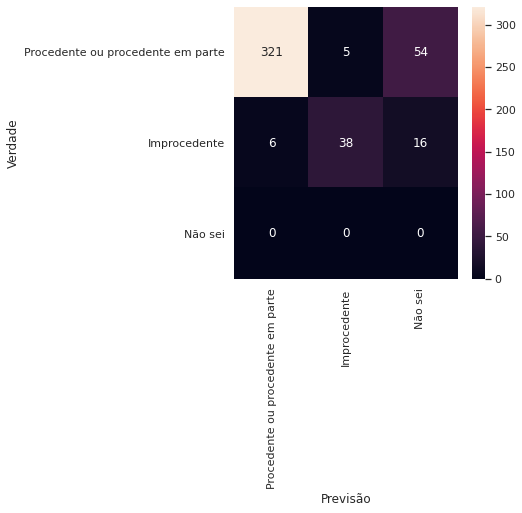

In [ ]:
conf_mat_nb = confusion_matrix(lista_resultado_alvo, resultado_resultado_pesquisa, rotulos_plt_alvo)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_nb, annot=True, fmt='d',
            xticklabels=rotulos_plt_alvo, yticklabels=rotulos_plt_alvo)
plt.ylabel('Verdade')
plt.xlabel('Previsão')
plt.show()

In [ ]:
#Matriz de confusão TextRank
resultado_resultado_pesquisa = df4.loc[df4['sumarizador'] == 'TextRank'].resultado
lista_resultado_alvo = df4.loc[df4['sumarizador'] == 'TextRank'].resultado_alvo
rotulos_plt_alvo = df4.loc[df4['sumarizador'] == 'TextRank'].resultado_alvo.unique()
rotulos_plt_alvo = np.append(rotulos_plt_alvo, 'Não sei')
rotulos_plt_pesquisa = df4.loc[df4['sumarizador'] == 'TextRank'].resultado.unique()

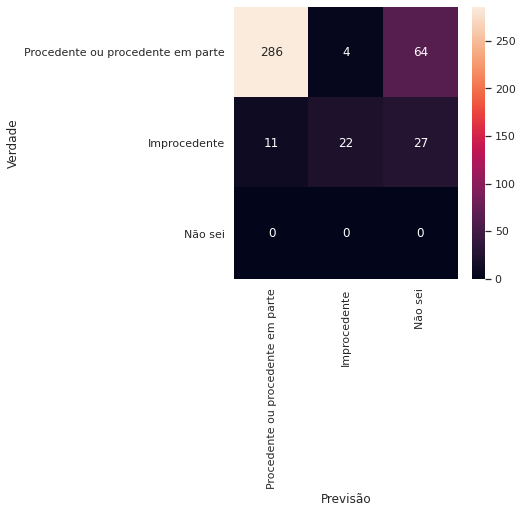

In [ ]:
conf_mat_nb = confusion_matrix(lista_resultado_alvo, resultado_resultado_pesquisa, rotulos_plt_alvo)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat_nb, annot=True, fmt='d',
            xticklabels=rotulos_plt_alvo, yticklabels=rotulos_plt_alvo)
plt.ylabel('Verdade')
plt.xlabel('Previsão')
plt.show()

In [ ]:
total_acertos_E = df4.loc[df4['sumarizador'] == 'Edmundson'].acertou_resultado.value_counts()[0] 
total_tentativas_E = df4.loc[df4['sumarizador'] == 'Edmundson'].acertou_resultado.value_counts()[0] + df4.loc[df4['sumarizador'] == 'Edmundson'].acertou_resultado.value_counts()[1]
percentual_acertos_E = total_acertos_E / total_tentativas_E
print(f'Percentual de acertos de resultado para os julgadores que leram o resumo Edmundson: em {total_tentativas_E} tentativas, acerto de {total_acertos_E}, ou {percentual_acertos_E:.2%}')

total_acertos_L = df4.loc[df4['sumarizador'] == 'Lsa'].acertou_resultado.value_counts()[0] 
total_tentativas_L = df4.loc[df4['sumarizador'] == 'Lsa'].acertou_resultado.value_counts()[0] + df4.loc[df4['sumarizador'] == 'Lsa'].acertou_resultado.value_counts()[1]
percentual_acertos_L = total_acertos_L / total_tentativas_L
print(f'Percentual de acertos de resultado para os julgadores que leram o resumo Lsa: em {total_tentativas_L} tentativas, acerto de {total_acertos_L}, ou {percentual_acertos_L:.2%}')

total_acertos_T = df4.loc[df4['sumarizador'] == 'TextRank'].acertou_resultado.value_counts()[0] 
total_tentativas_T = df4.loc[df4['sumarizador'] == 'TextRank'].acertou_resultado.value_counts()[0] + df4.loc[df4['sumarizador'] == 'TextRank'].acertou_resultado.value_counts()[1]
percentual_acertos_T = total_acertos_T / total_tentativas_T
print(f'Percentual de acertos de resultado para os julgadores que leram o resumo TextRank: em {total_tentativas_T} tentativas, acerto de {total_acertos_T}, ou {percentual_acertos_T:.2%}')

Percentual de acertos de resultado para os julgadores que leram o resumo Edmundson: em 418 tentativas, acerto de 392, ou 93.78%
Percentual de acertos de resultado para os julgadores que leram o resumo Lsa: em 440 tentativas, acerto de 359, ou 81.59%
Percentual de acertos de resultado para os julgadores que leram o resumo TextRank: em 414 tentativas, acerto de 308, ou 74.40%
